<a href="https://colab.research.google.com/github/Golden028/Machine_Learning/blob/main/JS05_TG03_2341720216_GOLDEN%20CHRISTIAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 1**

**Step 1 - Import Library**

Import required libraries

In [1]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Step 2 - Load Data and inspection**

At this stage, we will load the data into a dataframe and then inspect the first 5 rows.

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Next, inspect the data information,

In [3]:
df.info()

'It was found that there are 150 data points and no missing values in any of the variables.'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Step 3 - Features Selection**

Since we only need the features for the clustering process, we need to separate the features and labels using data slicing.

In [4]:
# Features Selection
X = df.iloc[:, 1:-1] # slice the features
y = df.iloc[:, -1] # this is the labels (we don't need it)

If you look at line 2, the slicing index used is [:, 1:-1], which means that the Id and Species (label) columns are not used.

Check the feature data by doing:

In [5]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


**Step 4 - Plotting**

At this stage, we will create a scatter plot to visualize the data distribution based on two features: SepalLengthCm and SepalWidthCm.

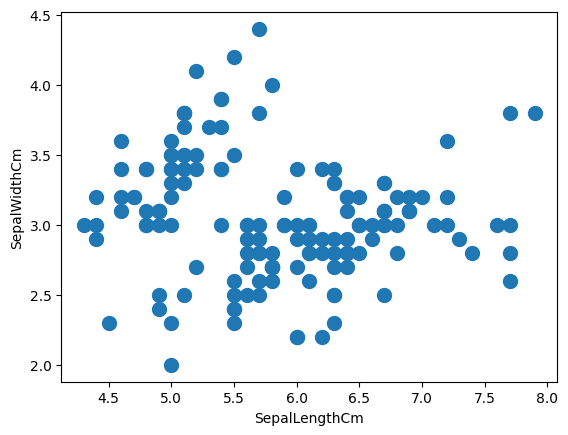

In [6]:
# Make a scatterplot using
# SepalLengthCm and SepalWidthCm
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

By visual inspection, we might assume that there are two clusters in the data.

**Step 5 - Build K-Means Model**

Next, we will build a K-Means model with the assumption of two clusters, based on the visual observation from the scatter plot.

In [7]:
# Build a K-Means Model
# Based on visual inspection using scatterplot,
# we can assumpt that the data has 2 cluster
# (even though, from the label, there are 3 labels in this data)

from sklearn.cluster import KMeans

# Initiate K-Means object with numbur of cluster is 2
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

After the model learns from the data using the fit_predict() function, we can check the clustering results by using a scatter plot.

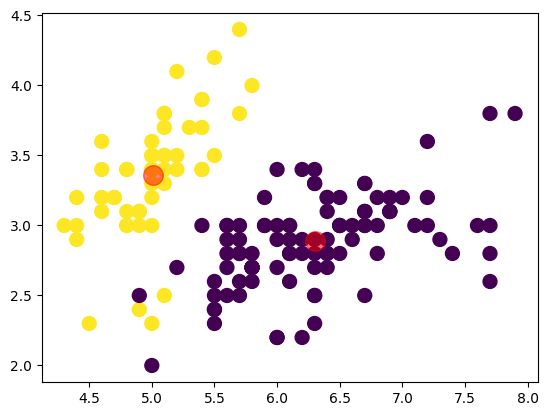

In [8]:
# Plot the clustering result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot the centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

**Step 6 - Model Evaluation**

To determine whether the resulting clustering model performs well, we need to carry out an evaluation process. One of the evaluation metrics we can use is the Sum of Squared Errors (SSE). To obtain the SSE value, we simply access the inertia_ property of the trained K-Means object.

In [9]:
# Print SSE value
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


Note: You may obtain a different value. Remember, the initial centroid positions are determined randomly!

**Step 7 - Find The Best k Using Elbow Method**

When building a clustering model, if we have not yet determined the number of clusters to use, we can apply the Elbow Method to find the optimal number of clusters. The working steps of the Elbow Method are quite simple:

1. Define the range of k values to be evaluated.
2. Calculate the SSE value for each k within the defined range.
3. Create a line plot to visualize the results as the basis for justification.

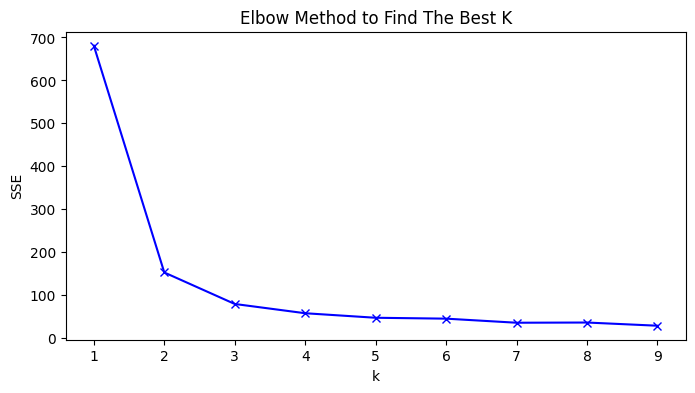

In [10]:
# Find the best k
# using Elbow Method

# List SSE values
sse = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

Based on the SSE line plot for each k, we can argue that the best value of k is 3. Why k = 3? This is because at k=2,  the SSE value is still too high compared to k=4, while at, say k=8, the SSE becomes very low. However, the best number of clusters is not simply determined by having the lowest SSE. SSE will always decrease as the number of clusters increases. This happens because the number of members in each cluster becomes smaller, and clusters naturally become narrower. In this context, we must find the position where the value of k shows a sharp drop, followed by a more stable decrease. This position is known as the “elbow point.” For the features we are currently using, the optimal value of k is 3.

# **Lab 2**

**Step 0 - Import Libraries**

Import required libraries

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Step 1 - Build Synthetic Data**

Kali ini kita akan membuat data sintentis untuk tujuan pembelajaran. Data yang akan kita buat akan berbentuk spiral untuk menyimulasikan kondisi non linear.

In [12]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

Plot the data to visualize the resulting dataset.

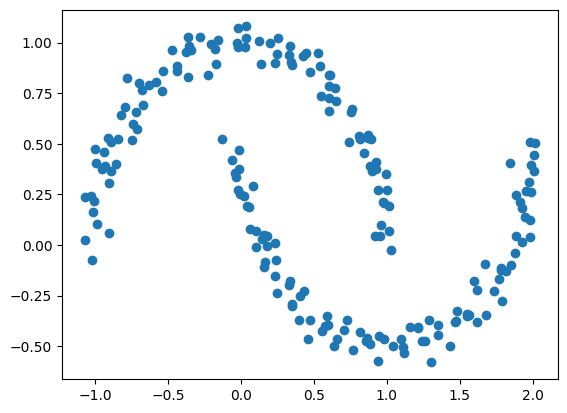

In [13]:
plt.scatter(X[:, 0], X[:, 1])

By visual inspection, there appear to be two clusters in the dataset. But can K-Means work well in this case? Let’s find out.

**Step 2 - Clustering Using K-Means**

Build a K-Means model,

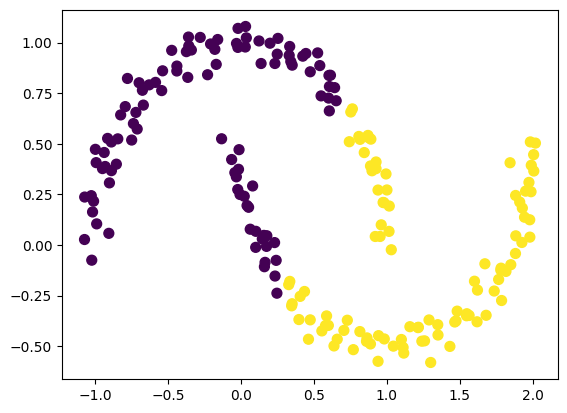

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=0)
cluster = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster, s=50, cmap='viridis')

Some data points are not clustered correctly. You can easily imagine an imaginary linear line being used to separate the two clusters. Perform further evaluation using the silhouette coefficient.

In [15]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster))

0.49215648268306905


This value indicates that the data is not clustered very well.

**Step 3 - Clustering Using DBSCAN**

Next, we will perform clustering using DBSCAN. Remember, DBSCAN is very sensitive to the parameters epsilon (ε) and min_samples!

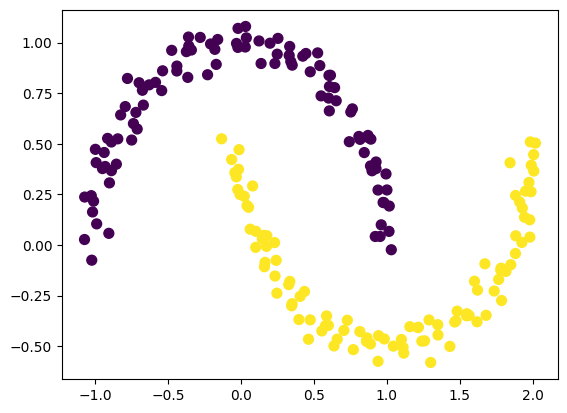

In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=2)
cluster_db = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')

Based on the scatter plot, the data can be clustered very well. To confirm this, we need to re-evaluate it using the silhouette score.

In [17]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster_db))

# Result: 0.32585318950197517

0.32585318950197517


The silhouette score results show a suboptimal outcome, even though the clusters are visually well-formed. Why is that? This happens because the silhouette coefficient assumes that clusters can be well separated in a linear form. Therefore, if the data distribution is irregular, the silhouette coefficient cannot evaluate effectively.

So, what evaluation can we perform instead? In simple terms:

- Percentage of noise data
- Visual inspection

In terms of metrics, we can use:

Davies-Bouldin Index (DBI) → focuses on the separation index; the smaller the value, the better. Its range is from 0 to infinity.

In [18]:
from sklearn.metrics import davies_bouldin_score

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(X, cluster_db)

print(f"Davies-Bouldin Index: {db}")

# Result
# Davies-Bouldin Index: 1.1622685374061352

Davies-Bouldin Index: 1.1622685374061352


# **Lab 3**

**Step 0 - Import Libraries**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Step 1 - Load The Data**

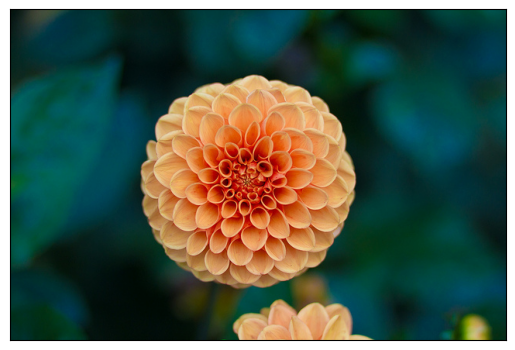

In [20]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

**Step 2 - Preprocessing**

In this step, we will perform normalization and resizing to the image.

In [21]:
# Check shape
print(flower.shape)

# Normalize color
data = flower / 255.0

# Reshape
data = data.reshape(427 * 640, 3) # turn to 1D

print(data.shape)

(427, 640, 3)
(273280, 3)


**Step 3 - Check Color Distribution**

Create this following function,

In [22]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

Call the function to check color distribution,

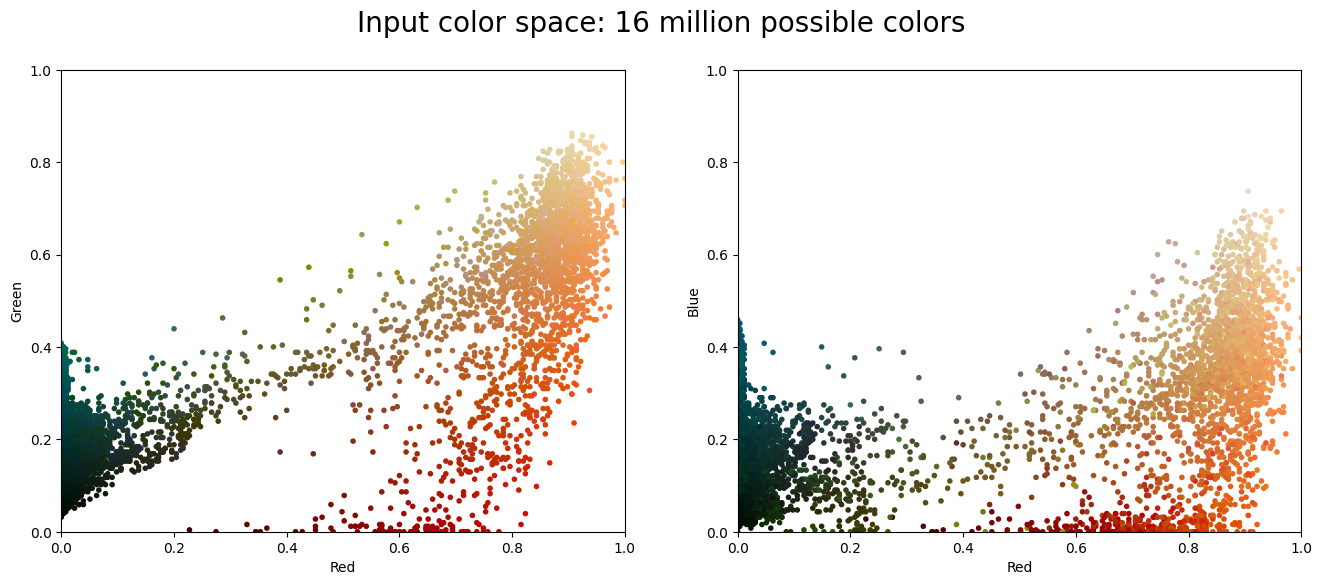

In [23]:
plot_pixels(data, title='Input color space: 16 million possible colors')

**Step 4 - Color Clustering Based on Similarity**

We wiil reduce the image colors only to 16 colors

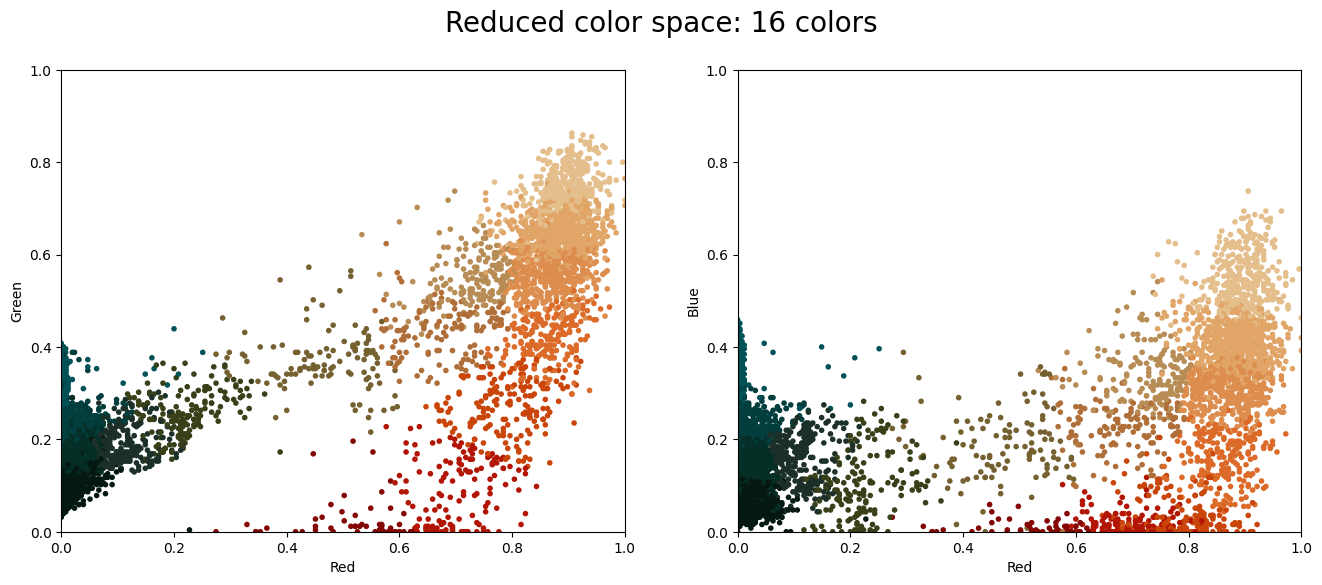

In [24]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

Next, we will compare the original image and color-reduced image,

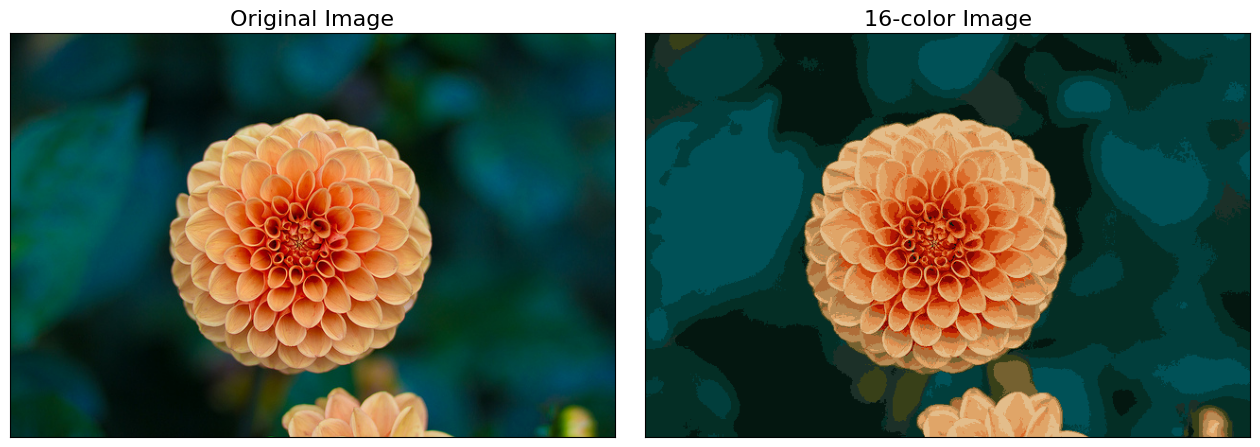

In [25]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# **Lab Assignment**

1. Create a scatter plot from the dataset using two variables, Avg_Credit_Limit and Total_Credit_Card. Determine whether the data distribution can be considered linear.

2. Build a clustering model using K-Means. Determine the optimal number of clusters (k) using the Elbow Method. Support your analysis with a line chart and an explanation of why you chose that value.

3. Visualize the clustering results from the K-Means model using a scatter plot.

4. Build a clustering model using DBSCAN with all available variables.

5. Determine the optimal number of clusters (k) using the Elbow Method. Support your analysis with a line chart and an explanation of why you chose that value.

6. Calculate the silhouette score and Davies–Bouldin Index (DBI) for the DBSCAN model.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

In [29]:
df = pd.read_csv("CC_Customer_Dataset.csv")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


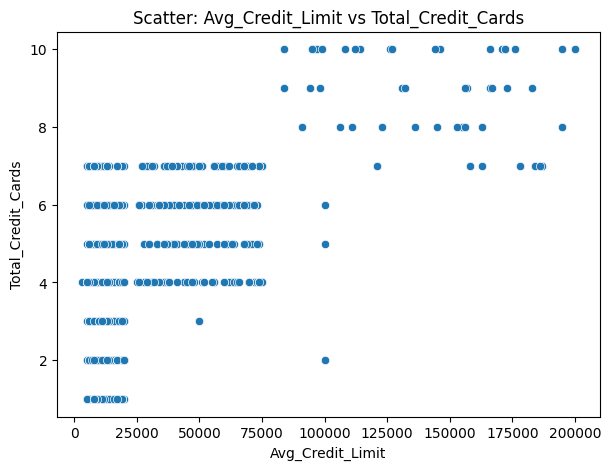

Pearson correlation: 0.6088604935524963


In [40]:
'1'

plt.figure(figsize=(7,5))
sns.scatterplot(x="Avg_Credit_Limit", y="Total_Credit_Cards", data=df)
plt.title("Scatter: Avg_Credit_Limit vs Total_Credit_Cards")
plt.show()

corr = df["Avg_Credit_Limit"].corr(df["Total_Credit_Cards"])
print("Pearson correlation:", corr)

- Create a scatter plot between the variables Avg_Credit_Limit and Total_Credit_Cards.
- The aim is to see the pattern of data distribution, whether it tends to be linear or not.
- Calculating Pearson correlation to measure the strength of the linear relationship (values close to +1 or -1 mean more linear, values close to 0 mean not linear).

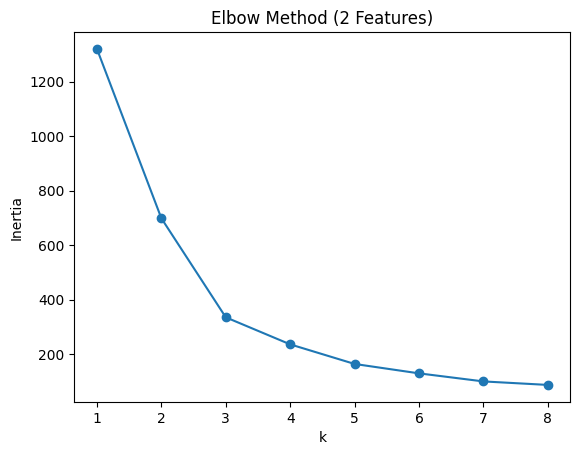

In [41]:
'2'

X = df[["Avg_Credit_Limit","Total_Credit_Cards"]].dropna()
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

inertia = []
K = range(1,9)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method (2 Features)")
plt.show()

- Take two features (Avg_Credit_Limit, Total_Credit_Cards) and standardize them (important for clustering).
- Train the K-Means model for the number of clusters k=1 to k=8.
- Store the inertia value (total distance within the cluster) for each k.
- Make an Elbow Method plot → the elbow point is the optimal number of clusters.

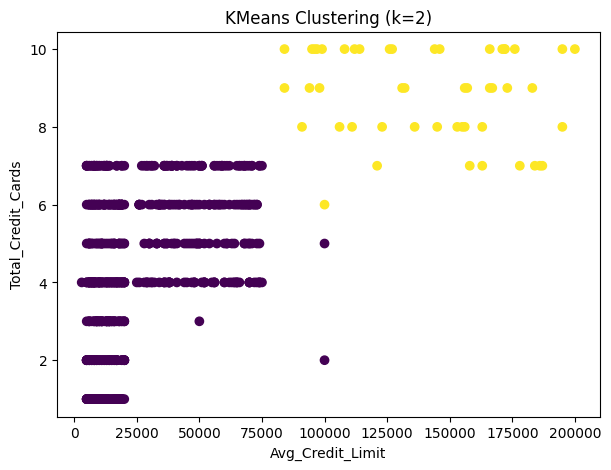

In [42]:
'3'

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X_scaled)
labels = kmeans.labels_

plt.figure(figsize=(7,5))
plt.scatter(X["Avg_Credit_Limit"], X["Total_Credit_Cards"], c=labels, cmap="viridis")
plt.xlabel("Avg_Credit_Limit")
plt.ylabel("Total_Credit_Cards")
plt.title("KMeans Clustering (k=2)")
plt.show()

- Create a K-Means model with k=2 clusters (according to Elbow's results).

- Retrieve cluster labels.

- Create scatter plots with different colors for each cluster, so that the distribution of clustering results can be visualized.

Hasil DBSCAN cluster counts:
 0    608
 1     48
-1      4
Name: count, dtype: int64


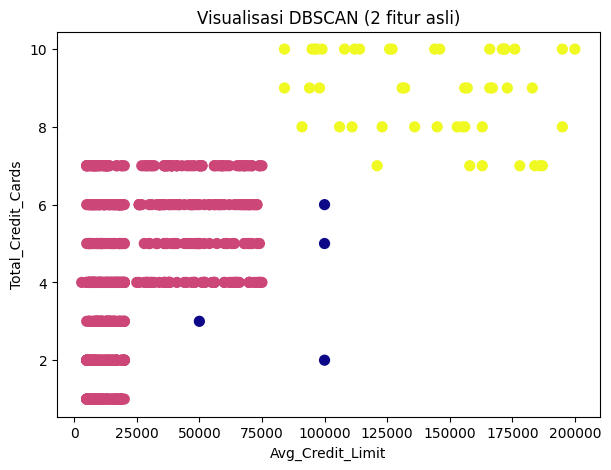

In [43]:
'4'

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X_all = df[num_cols].dropna()

scaler_all = StandardScaler().fit(X_all)
X_all_scaled = scaler_all.transform(X_all)

dbscan = DBSCAN(eps=2.0, min_samples=5).fit(X_all_scaled)
labels_db = dbscan.labels_

print("Hasil DBSCAN cluster counts:")
print(pd.Series(labels_db).value_counts())

plt.figure(figsize=(7,5))
plt.scatter(df["Avg_Credit_Limit"], df["Total_Credit_Cards"],
            c=labels_db, cmap="plasma", s=50)
plt.xlabel("Avg_Credit_Limit")
plt.ylabel("Total_Credit_Cards")
plt.title("Visualisasi DBSCAN (2 fitur asli)")
plt.show()

- Using all numerical variables for clustering with DBSCAN.
- Standardize the data before modeling.
- eps=2.0, min_samples=5 are DBSCAN parameters (customizable).
- Displays the number of members of each cluster (including noise = -1).
- Scatter plot visualized using two main features (Avg_Credit_Limit and Total_Credit_Cards) for easy interpretation.

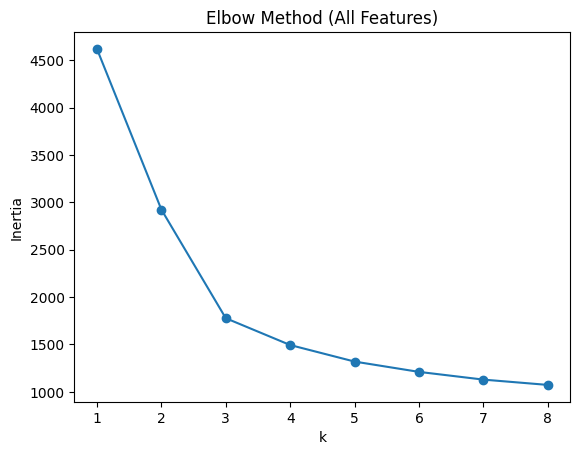

In [46]:
'5'

inertia_all = []
K = range(1,9)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_all_scaled)
    inertia_all.append(km.inertia_)

plt.plot(K, inertia_all, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method (All Features)")
plt.show()

Code explanation
- All numeric feature data (X_all_scaled) is used as clustering input.
- K-Means iteration is performed for the number of clusters (k) from 1 to 8.
- Each model calculates the inertia value (total squared distance between data and cluster centroid).
- The inertia value is then plotted as a graph with X axis = number of clusters, and Y axis = inertia.
The more clusters, the smaller the inertia value.

Line Chart Results
- Elbow Method charts usually show a sharp drop in inertia at the beginning, then a gradual slope.
- The "elbow" point is the most optimal number of clusters.
- At this point, adding new clusters no longer gives a significant reduction in inertia.

Analysis & Conclusion
- The inertia value decreases dramatically from k=1 to k=2, and is still quite significant until k=3.
- After k=3, the line starts to slope, meaning that additional clusters do not reduce inertia much.
- Therefore, the optimal number of clusters is k = 3.

*** Translated with www.DeepL.com/Translator (free version) ***



In [45]:
'6'

print("DBSCAN cluster counts:", pd.Series(labels_db).value_counts())

mask = labels_db != -1
if len(set(labels_db[mask])) > 1:
    sil = silhouette_score(X_all_scaled[mask], labels_db[mask])
    dbi = davies_bouldin_score(X_all_scaled[mask], labels_db[mask])
    print("Silhouette Score:", sil)
    print("Davies–Bouldin Index:", dbi)
else:
    print("DBSCAN found <2 clusters (metrics not available).")

DBSCAN cluster counts:  0    608
 1     48
-1      4
Name: count, dtype: int64
Silhouette Score: 0.501301516729479
Davies–Bouldin Index: 0.743621242998405


- Recalculate the number of DBSCAN cluster members.
- Create a mask (mask = labels_db != -1) to ignore noise.
- If the number of clusters ≥ 2:
- Silhouette Score → the higher the better (0.5 and above is considered good).
- Davies-Bouldin Index (DBI) → the lower the better.
- If there is only 1 cluster, the metric cannot be calculated.